In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_csv('/content/Road Accident Data.csv')

Data Pre-Processing


In [7]:
# Convert 'Accident Date' to datetime format
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=False)

# Extract hour from 'Time' column
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Select relevant columns for analysis
selected_columns = ['Day_of_Week', 'Junction_Control', 'Accident_Severity', 'Light_Conditions',
                    'Road_Surface_Conditions', 'Weather_Conditions', 'Time', 'Urban_or_Rural_Area']

df = df[selected_columns]

# Drop rows with missing values
df = df.dropna()

Encode categorical variables

In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

<ipython-input-8-79fab7de3cdf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-8-79fab7de3cdf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-8-79fab7de3cdf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [9]:
# Split data into features (X) and target (y)
X = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

Train-test split
train - 70%
test - 30%

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Training (Gradient Boosting Machine)

In [11]:
# Initialize Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [14]:
# Train the model
gbm.fit(X_train, y_train)

# Predictions on the test set
y_pred = gbm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [15]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy*100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1159
           1       0.00      0.00      0.00        14
           2       1.00      0.00      0.00     12081
           3       0.85      1.00      0.92     77302

    accuracy                           0.85     90556
   macro avg       0.46      0.25      0.23     90556
weighted avg       0.86      0.85      0.79     90556

Confusion Matrix:
[[    0     0     0  1159]
 [    0     0     0    14]
 [    0     0     1 12080]
 [    0     0     0 77302]]
Accuracy: 85.36%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


making predictions for new data points

In [31]:
new_data = pd.DataFrame({
    'Day_of_Week': ['Monday', 'Friday'],
    'Junction_Control': ['Auto traffic signal', 'Give way or uncontrolled'],
    'Light_Conditions': ['Daylight', 'Darkness - lights lit'],
    'Road_Surface_Conditions': ['Dry', 'Wet or damp'],
    'Weather_Conditions': ['Fine no high winds', 'Raining no high winds'],
    'Time': ['08:30', '18:00'],
    'Urban_or_Rural_Area': ['Urban', 'Urban']
})

In [32]:
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        label_encoder.fit(new_data[col])
        new_data[col] = label_encoder.transform(new_data[col])


In [33]:
# Predict using the trained GBM model
predictions = gbm.predict(new_data)

In [34]:
# Print predictions
for i, pred in enumerate(predictions):
    print(f"Prediction for data point {i+1}: {pred}")

Prediction for data point 1: 3
Prediction for data point 2: 3


Visualization of Accident Hotspots and Contributing Factors

In [23]:
df.columns


Index(['Day_of_Week', 'Junction_Control', 'Accident_Severity',
       'Light_Conditions', 'Road_Surface_Conditions', 'Weather_Conditions',
       'Time', 'Urban_or_Rural_Area'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


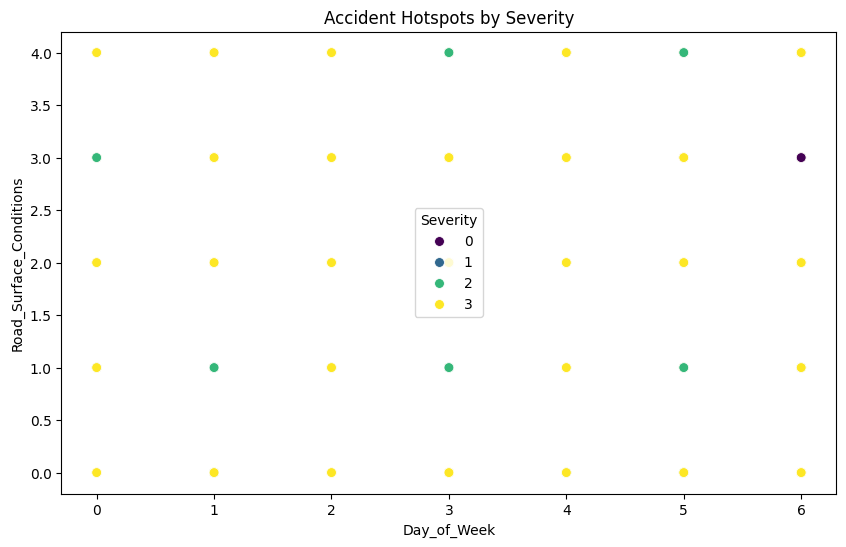

In [26]:
# Visualization of accident hotspots based on latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day_of_Week', y='Road_Surface_Conditions', hue='Accident_Severity', data=df, palette='viridis', s=50)
plt.title('Accident Hotspots by Severity')
plt.xlabel('Day_of_Week')
plt.ylabel('Road_Surface_Conditions')
plt.legend(title='Severity')
plt.show()

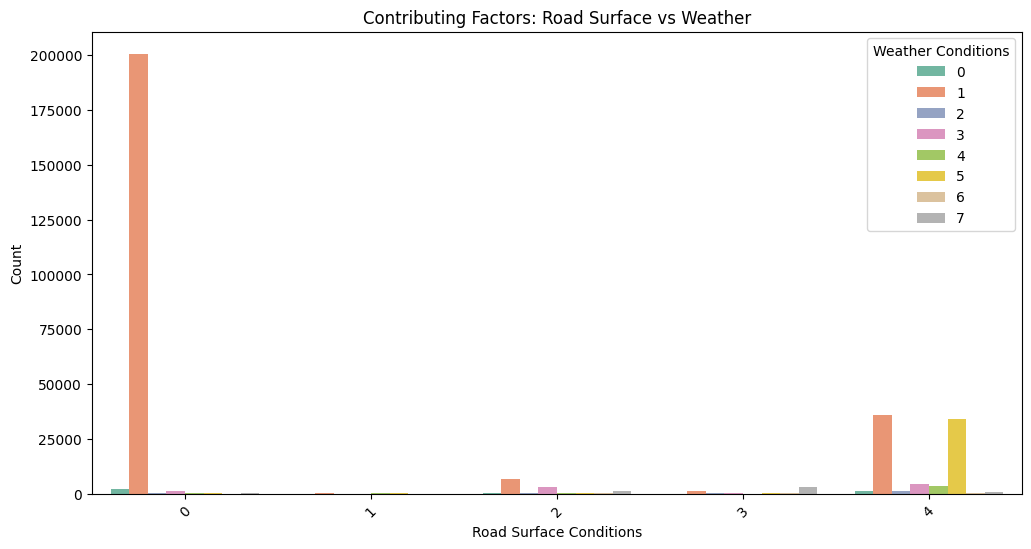

In [25]:
# Visualization of contributing factors like road surface conditions and weather
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_Surface_Conditions', hue='Weather_Conditions', data=df, palette='Set2')
plt.title('Contributing Factors: Road Surface vs Weather')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.legend(title='Weather Conditions')
plt.xticks(rotation=45)
plt.show()